# FTE/BTE Experiment for food-101

The progressive learning package utilizes representation ensembling algorithms to sequentially learn a representation for each task and ensemble both old and new representations for all future decisions. 

Here, a representation ensembling algorithm based on decision forests (Lifelong Forest) demonstrate forward and backward knowledge transfer of tasks on the food-101 dataset.

### Import necessary packages and modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool

### Load food-101 data 
We load the food-101 dataset from .npz files generated by running the algorithms found in https://github.com/neurodata/LLF_tidy_images. The training and test partitions are concatenated into one variable called `data_x`, but only 100 of the 101 available classes are used for this experiment. The original dataset can be found at https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf and https://www.tensorflow.org/datasets/catalog/food101.

In [2]:
# load dict of arrays
dict_data_x_1 = np.load('food_101_array_data_x_1.npz')
dict_data_x_2 = np.load('food_101_array_data_x_2.npz')
dict_data_x_3 = np.load('food_101_array_data_x_3.npz')
# extract the first array
data_x = np.concatenate([dict_data_x_1['arr_0'], dict_data_x_2['arr_0'], dict_data_x_3['arr_0']])
# print the array shape
print(data_x.shape)

(100000, 32, 32, 3)


In [3]:
# load dict of arrays
dict_data_y = np.load('food_101_array_data_y.npz')
# extract the first array
data_y = dict_data_y['arr_0']
# print the array shape
print(data_y.shape)

(100000,)


### Define hyperparameters for the model and preprocess data
Running the cells below will define the hyperparameters the experimental setting 

`num_points_per_task`: The number of points per task 

In [4]:
num_points_per_task = 900

### Train the model and perform validation

#### run_parallel_exp: 
Wrapper method for the `LF_experiment` function which declares and trains the model, and performs validation with respect to the test data to compute the error of the model at a particular iteration

In [5]:
from functions.fte_bte_food_101_functions_slots_shifts import run_bte_exp

def run_parallel_exp(slot):
    
    df_list = run_bte_exp(data_x, data_y, num_points_per_task, slot = slot)
    
    return df_list

In [6]:
slots = np.arange(0,10,1)
acc = []

with Pool(8) as p:
    # Multiple sets of errors for each set of angles are appended to a larger array containing errors for all angles
    # Calling LF_experiment will run the experiment at a new angle of rotation
    acc.append(
        p.map(run_parallel_exp, slots)
    )

Starting Task 0 For Slot 2 For Shift 0
Starting Task 0 For Slot 3 For Shift 0
Starting Task 0 For Slot 4 For Shift 0
Starting Task 0 For Slot 1 For Shift 0
Starting Task 0 For Slot 0 For Shift 0Starting Task 0 For Slot 6 For Shift 0

Starting Task 0 For Slot 5 For Shift 0
Starting Task 0 For Slot 7 For Shift 0
Accuracy Across Tasks: [0.267]
Starting Task 1 For Slot 3 For Shift 0
Accuracy Across Tasks: [0.237]
Starting Task 1 For Slot 1 For Shift 0
Accuracy Across Tasks: [0.227]
Starting Task 1 For Slot 6 For Shift 0
Accuracy Across Tasks: [0.263]
Starting Task 1 For Slot 7 For Shift 0
Accuracy Across Tasks: [0.267]
Starting Task 1 For Slot 4 For Shift 0
Accuracy Across Tasks: [0.241]
Starting Task 1 For Slot 2 For Shift 0
Accuracy Across Tasks: [0.273]
Starting Task 1 For Slot 5 For Shift 0
Accuracy Across Tasks: [0.284]
Starting Task 1 For Slot 0 For Shift 0
Accuracy Across Tasks: [0.284, 0.308]
Starting Task 2 For Slot 0 For Shift 0
Accuracy Across Tasks: [0.267, 0.279]
Starting Task

Accuracy Across Tasks: [0.238, 0.252, 0.246, 0.258, 0.261, 0.26, 0.271, 0.275, 0.278, 0.284]
Starting Task 0 For Slot 1 For Shift 2
Accuracy Across Tasks: [0.234]
Starting Task 1 For Slot 0 For Shift 2
Accuracy Across Tasks: [0.25]
Starting Task 1 For Slot 5 For Shift 2
Accuracy Across Tasks: [0.253]
Starting Task 1 For Slot 6 For Shift 2
Accuracy Across Tasks: [0.259]
Starting Task 1 For Slot 3 For Shift 2
Accuracy Across Tasks: [0.246]
Starting Task 1 For Slot 4 For Shift 2
Accuracy Across Tasks: [0.261]
Starting Task 1 For Slot 2 For Shift 2
Accuracy Across Tasks: [0.236]
Starting Task 1 For Slot 7 For Shift 2
Accuracy Across Tasks: [0.228]
Starting Task 1 For Slot 1 For Shift 2
Accuracy Across Tasks: [0.234, 0.265]
Starting Task 2 For Slot 0 For Shift 2
Accuracy Across Tasks: [0.25, 0.259]
Starting Task 2 For Slot 5 For Shift 2
Accuracy Across Tasks: [0.253, 0.257]
Starting Task 2 For Slot 6 For Shift 2
Accuracy Across Tasks: [0.261, 0.28]
Starting Task 2 For Slot 2 For Shift 2
Acc

Accuracy Across Tasks: [0.244]
Starting Task 1 For Slot 5 For Shift 4
Accuracy Across Tasks: [0.256]
Starting Task 1 For Slot 0 For Shift 4
Accuracy Across Tasks: [0.254]
Starting Task 1 For Slot 4 For Shift 4
Accuracy Across Tasks: [0.272]
Starting Task 1 For Slot 7 For Shift 4
Accuracy Across Tasks: [0.231]
Starting Task 1 For Slot 2 For Shift 4
Accuracy Across Tasks: [0.247]
Starting Task 1 For Slot 3 For Shift 4
Accuracy Across Tasks: [0.233]
Starting Task 1 For Slot 1 For Shift 4
Accuracy Across Tasks: [0.252, 0.266]
Starting Task 2 For Slot 6 For Shift 4
Accuracy Across Tasks: [0.244, 0.259]
Starting Task 2 For Slot 5 For Shift 4
Accuracy Across Tasks: [0.256, 0.288]
Starting Task 2 For Slot 0 For Shift 4
Accuracy Across Tasks: [0.254, 0.265]
Starting Task 2 For Slot 4 For Shift 4
Accuracy Across Tasks: [0.272, 0.29]
Starting Task 2 For Slot 7 For Shift 4
Accuracy Across Tasks: [0.231, 0.246]
Starting Task 2 For Slot 2 For Shift 4
Accuracy Across Tasks: [0.247, 0.264]
Starting Ta

Starting Task 1 For Slot 2 For Shift 6
Accuracy Across Tasks: [0.277]
Starting Task 1 For Slot 7 For Shift 6
Accuracy Across Tasks: [0.223]
Starting Task 1 For Slot 5 For Shift 6
Accuracy Across Tasks: [0.25]
Starting Task 1 For Slot 3 For Shift 6
Accuracy Across Tasks: [0.233]
Starting Task 1 For Slot 1 For Shift 6
Accuracy Across Tasks: [0.218, 0.229]
Starting Task 2 For Slot 6 For Shift 6
Accuracy Across Tasks: [0.234, 0.279]
Starting Task 2 For Slot 4 For Shift 6
Accuracy Across Tasks: [0.252, 0.265]
Starting Task 2 For Slot 0 For Shift 6
Accuracy Across Tasks: [0.22, 0.26]
Starting Task 2 For Slot 2 For Shift 6
Accuracy Across Tasks: [0.277, 0.27]
Starting Task 2 For Slot 7 For Shift 6
Accuracy Across Tasks: [0.223, 0.253]
Starting Task 2 For Slot 5 For Shift 6
Accuracy Across Tasks: [0.25, 0.261]
Starting Task 2 For Slot 3 For Shift 6
Accuracy Across Tasks: [0.233, 0.256]
Starting Task 2 For Slot 1 For Shift 6
Accuracy Across Tasks: [0.234, 0.279, 0.297]
Starting Task 3 For Slot 

Starting Task 1 For Slot 3 For Shift 8
Accuracy Across Tasks: [0.253, 0.264]
Starting Task 2 For Slot 7 For Shift 8
Accuracy Across Tasks: [0.26, 0.28]
Starting Task 2 For Slot 6 For Shift 8
Accuracy Across Tasks: [0.27, 0.275]
Starting Task 2 For Slot 4 For Shift 8
Accuracy Across Tasks: [0.269, 0.286]
Starting Task 2 For Slot 0 For Shift 8
Accuracy Across Tasks: [0.231, 0.248]
Starting Task 2 For Slot 2 For Shift 8
Accuracy Across Tasks: [0.26, 0.277]
Starting Task 2 For Slot 5 For Shift 8
Accuracy Across Tasks: [0.25, 0.252]
Starting Task 2 For Slot 1 For Shift 8
Accuracy Across Tasks: [0.264, 0.259]
Starting Task 2 For Slot 3 For Shift 8
Accuracy Across Tasks: [0.253, 0.264, 0.273]
Starting Task 3 For Slot 7 For Shift 8
Accuracy Across Tasks: [0.26, 0.28, 0.279]
Starting Task 3 For Slot 6 For Shift 8
Accuracy Across Tasks: [0.27, 0.275, 0.29]
Starting Task 3 For Slot 4 For Shift 8
Accuracy Across Tasks: [0.269, 0.286, 0.302]
Starting Task 3 For Slot 0 For Shift 8
Accuracy Across Ta

Accuracy Across Tasks: [0.262, 0.284, 0.292, 0.302, 0.3, 0.303]
Starting Task 6 For Slot 9 For Shift 0
Accuracy Across Tasks: [0.262, 0.266, 0.268, 0.279, 0.28, 0.279, 0.276]
Starting Task 7 For Slot 8 For Shift 0
Accuracy Across Tasks: [0.262, 0.284, 0.292, 0.302, 0.3, 0.303, 0.298]
Starting Task 7 For Slot 9 For Shift 0
Accuracy Across Tasks: [0.262, 0.266, 0.268, 0.279, 0.28, 0.279, 0.276, 0.278]
Starting Task 8 For Slot 8 For Shift 0
Accuracy Across Tasks: [0.262, 0.284, 0.292, 0.302, 0.3, 0.303, 0.298, 0.3]
Starting Task 8 For Slot 9 For Shift 0
Accuracy Across Tasks: [0.262, 0.266, 0.268, 0.279, 0.28, 0.279, 0.276, 0.278, 0.274]
Starting Task 9 For Slot 8 For Shift 0
Accuracy Across Tasks: [0.262, 0.284, 0.292, 0.302, 0.3, 0.303, 0.298, 0.3, 0.308]
Starting Task 9 For Slot 9 For Shift 0
Accuracy Across Tasks: [0.262, 0.266, 0.268, 0.279, 0.28, 0.279, 0.276, 0.278, 0.274, 0.278]
Starting Task 0 For Slot 8 For Shift 1
Accuracy Across Tasks: [0.262, 0.284, 0.292, 0.302, 0.3, 0.303, 

Starting Task 7 For Slot 9 For Shift 8
Accuracy Across Tasks: [0.269, 0.272, 0.277, 0.282, 0.278, 0.283, 0.276]
Starting Task 7 For Slot 8 For Shift 8
Accuracy Across Tasks: [0.256, 0.271, 0.286, 0.292, 0.303, 0.313, 0.307, 0.315]
Starting Task 8 For Slot 9 For Shift 8
Accuracy Across Tasks: [0.269, 0.272, 0.277, 0.282, 0.278, 0.283, 0.276, 0.274]
Starting Task 8 For Slot 8 For Shift 8
Accuracy Across Tasks: [0.256, 0.271, 0.286, 0.292, 0.303, 0.313, 0.307, 0.315, 0.31]
Starting Task 9 For Slot 9 For Shift 8
Accuracy Across Tasks: [0.269, 0.272, 0.277, 0.282, 0.278, 0.283, 0.276, 0.274, 0.269]
Starting Task 9 For Slot 8 For Shift 8
Accuracy Across Tasks: [0.256, 0.271, 0.286, 0.292, 0.303, 0.313, 0.307, 0.315, 0.31, 0.306]
Starting Task 0 For Slot 9 For Shift 9
Accuracy Across Tasks: [0.269, 0.272, 0.277, 0.282, 0.278, 0.283, 0.276, 0.274, 0.269, 0.279]
Starting Task 0 For Slot 8 For Shift 9
Accuracy Across Tasks: [0.24]
Starting Task 1 For Slot 9 For Shift 9
Accuracy Across Tasks: [0.

In [31]:
# Average accuracies accross all shifts and slots for each task
acc_x = []
acc_y = []
acc_z = []
for z in range(10):
    for y in range(10):
        for x in range(10):
            acc_x.append(acc[0][x][y]['task_accuracy'][z])
        acc_y.append(np.mean(acc_x))
        acc_x = []
    acc_z.append(np.mean(acc_y))
    acc_y = []
print(acc_z)

[0.24843, 0.26381, 0.27146000000000003, 0.27658, 0.28040999999999994, 0.28084, 0.28303, 0.28528, 0.2854, 0.28627]


In [35]:
import pickle

In [37]:
file_to_save = 'results/task_1_accuracies_BTE.pickle'
with open(file_to_save, 'wb') as f:
    pickle.dump(acc_z, f)

### Function to calculate backward transfer efficiency

The backward transfer efficiency of $f_n$ for task $t$ given $n$ samples is 
$$BTE^t (f_n) := \mathbb{E} [R^t (f_n^{<t} )/R^t (f_n)]$$

We say an algorithm achieves backward transfer for task $t$ if and only if $BTE^t(f_n) > 1$. Intuitively, this means that the progressive learner has used data associated with new tasks to improve performance on previous tasks. 

In [32]:
btes = acc_z/acc_z[0]
print(btes)

[1.         1.06190879 1.09270217 1.1133116  1.12872841 1.13045928
 1.13927464 1.14833152 1.14881456 1.15231655]


### Plotting the backward transfer efficiency
Run cell to generate plot of backward transfer efficiency of the Lifelong Classification Forest algorithm. We see that we achieve backwards transfer overall that increases as more tasks are seen.

#### plot_bte:
Function used to plot bte across tasks

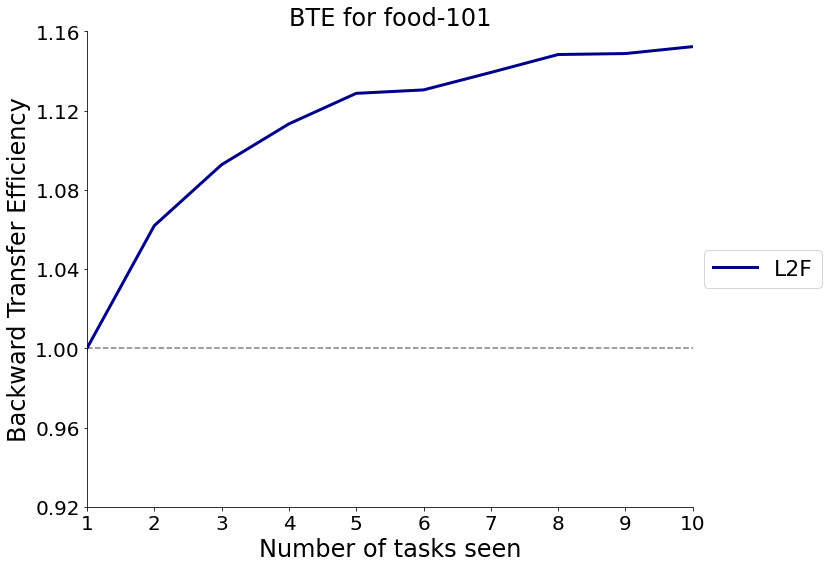

In [33]:
from functions.fte_bte_food_101_functions_slots_shifts import plot_bte

plot_bte(btes)